Data 620 Web Analytics

Summer 2023

Khyati Naik

Laura Puebla

video Link at :- https://youtu.be/89oRAFcrokg

Please answer the following questions in an IPython Notebook, posted to GitHub.
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Total words: 1161192
Unique words: 56057
Unique words representing half of the total words: 89
Cumulative Count of the common words representing half of the total words: 580840
200 highest frequency words:
the - 62713
, - 58334
. - 49346
of - 36080
and - 27915
to - 25732
a - 21881
in - 19536
that - 10237
is - 10011
was - 9777
for - 8841
`` - 8837
'' - 8789
The - 7258
with - 7012
it - 6723
as - 6706
he - 6566
his - 6466
on - 6395
be - 6344
; - 5566
I - 5161
by - 5103
had - 5102
at - 4963
? - 4693
not - 4423
are - 4333
from - 4207
or - 4118
this - 3966
have - 3892
an - 3542
which - 3540
-- - 3432
were - 3279
but - 3007
He - 2982
her - 2885
one - 2873
they - 2773
you - 2766
all - 2726
would - 2677
him - 2576
their - 2562
been - 2470
) - 2466
( - 2435
has - 2425
will - 2204
who - 2192
more - 2130
out - 2058
It - 2037
we - 1973
she - 1949
said - 1943
there - 1877
up - 1874
In - 1801
: - 1795
than - 1788
them - 1786
into - 1782
no - 1781
its - 1780
about - 1766
so - 1755
when - 1746
can - 17

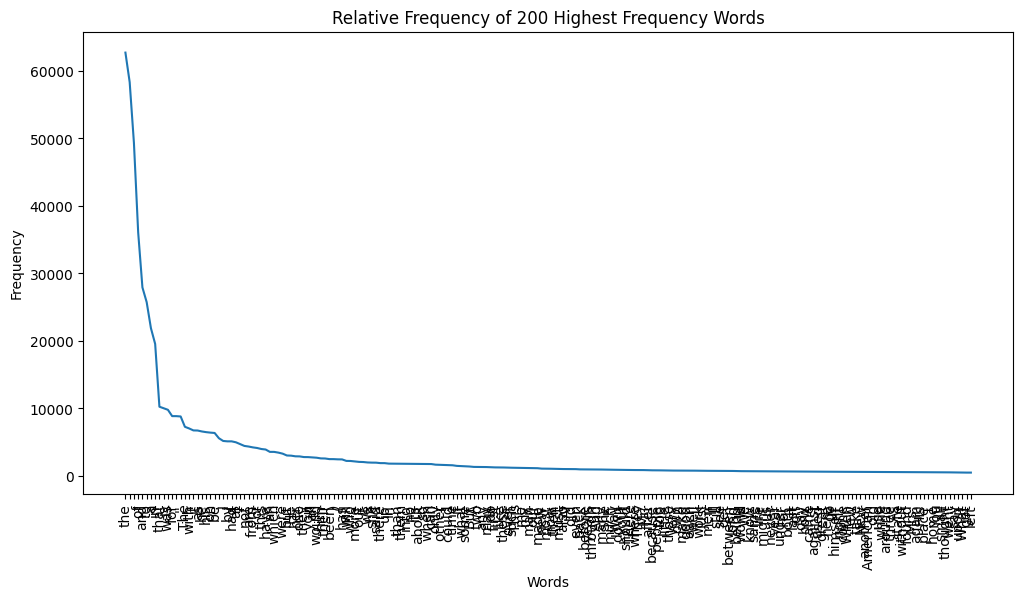

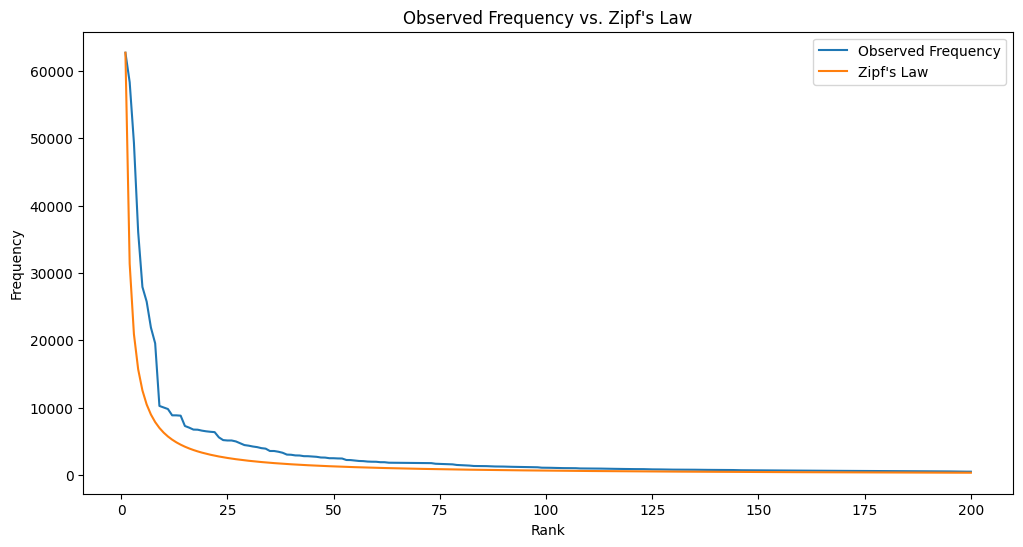

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Top 10 words with the largest frequency differences:
the - 62711.00713030549
, - 58334.0
. - 49346.0
of - 36078.00713030549
and - 27913.007130305486
to - 25730.007130305486
a - 21879.007130305486
in - 19534.007130305486
that - 10235.007130305488
is - 10010.003565152743


In [1]:
import nltk

# Download the Brown Corpus
nltk.download('brown')

from nltk.corpus import brown
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# 1: Choose a corpus of interest
corpus = brown

# 2: Calculate the total unique words in the corpus
total_words = len(corpus.words())
unique_words = len(set(corpus.words()))
print("Total words:", total_words)
print("Unique words:", unique_words)

# 3: Find the number of unique words representing half of the total words

'''

half_total_words = total_words // 2: This line calculates the integer division of total_words by 2, giving us the number of words that represent half of the total words in the corpus.

word_freq_dist = FreqDist(corpus.words()): This line creates a frequency distribution of words in the corpus using the FreqDist class from NLTK. The frequency distribution counts the occurrences of each word in the corpus.

most_common_words = [word for word, frequency in word_freq_dist.most_common(unique_words)]: This line creates a list most_common_words containing the most common words in the corpus. The most_common() method of the FreqDist class returns a list of word-frequency pairs in descending order of frequency. Here, we extract only the words and ignore the frequencies.

cumulative_count = 0 and unique_count = 0: These variables are initialized to keep track of the cumulative count of words and the number of unique words encountered.

for word in most_common_words:: This is a loop that iterates over the most common words in the corpus.

cumulative_count += word_freq_dist[word]: This line adds the frequency of the current word to the cumulative_count variable, representing the cumulative sum of word frequencies encountered so far.

unique_count += 1: This line increments the unique_count variable, indicating that a new unique word has been encountered.

if cumulative_count >= half_total_words: break: This conditional statement checks if the cumulative count has reached or exceeded the number of words representing half of the total words. If it has, the loop is terminated using the break statement.

print("Unique words representing half of the total words:", unique_count): Finally, this line prints the value of unique_count, which represents the number of unique words that account for half of the total words in the corpus.

In summary, this code calculates the number of unique words required to represent half of the total words in the corpus by iterating over the most common words in the corpus and summing their frequencies until the cumulative count reaches or exceeds the halfway point.

'''

half_total_words = total_words // 2
word_freq_dist = FreqDist(corpus.words())
most_common_words = [word for word, frequency in word_freq_dist.most_common(unique_words)]
cumulative_count = 0
unique_count = 0
for word in most_common_words:
    cumulative_count += word_freq_dist[word]
    unique_count += 1
    if cumulative_count >= half_total_words:
        break
print("Unique words representing half of the total words:", unique_count)
print("Cumulative Count of the common words representing half of the total words:", cumulative_count)

# 4: Get the 200 highest frequency words
highest_freq_words = word_freq_dist.most_common(200)
print("200 highest frequency words:")
for word, frequency in highest_freq_words:
    print(word, "-", frequency)

# 5: Create a graph of the relative frequency of the 200 words
words, frequencies = zip(*highest_freq_words)
plt.figure(figsize=(12, 6))
plt.plot(words, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Relative Frequency of 200 Highest Frequency Words')
plt.show()

# 6: Check if the relative frequency follows Zipf's law

'''
It states that the frequency of a word is inversely proportional to its rank in the frequency table.
In other words, the most frequent word occurs approximately twice as often as the second most frequent word, three times as often as the third most frequent word, and so on.

'''
ranks = range(1, len(highest_freq_words) + 1)
zipf_frequencies = [highest_freq_words[0][1] / rank for rank in ranks]
plt.figure(figsize=(12, 6))
plt.plot(ranks, frequencies, label='Observed Frequency')
plt.plot(ranks, zipf_frequencies, label="Zipf's Law")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Observed Frequency vs. Zipf\'s Law')
plt.legend()
plt.show()


#7: In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

# Please note that the comparison between the Brown Corpus and "all words in all corpora" is based
# on the assumption that nltk.corpus.words.words() represents all words in all corpora.

nltk.download('words')

# Get the overall word frequencies in all corpora (using NLTK's corpus.words)
all_words_freq_dist = FreqDist(nltk.corpus.words.words())

# Compare the frequency of words in the Brown Corpus with the overall frequency
differences = {}

for word, frequency in word_freq_dist.items():
    brown_freq = frequency
    all_freq = all_words_freq_dist.freq(word) * len(all_words_freq_dist)
    difference = brown_freq - all_freq
    differences[word] = difference

# Sort the words based on the differences
sorted_differences = sorted(differences.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 words with the largest differences
print("Top 10 words with the largest frequency differences:")
for word, difference in sorted_differences[:10]:
    print(word, "-", difference)
